# SVM implementation

In [35]:
# Import necessary modules
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import svm, datasets

In [36]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [37]:
X = df.drop("Outcome",axis="columns")
y = df.Outcome

In [38]:
# Dataset scaling - Dataset scaling is transforming a dataset to fit within a specific range.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2,random_state = 0)

In [40]:
print("shape of Training data X_train :"+str(X_train.shape))
print("shape of Test Data X_test :"+str(X_test.shape))
print("shape of Training Labels y_train :"+str(y_train.shape))
print("shape of Test Labels y_test :"+str(y_test.shape))

shape of Training data X_train :(614, 8)
shape of Test Data X_test :(154, 8)
shape of Training Labels y_train :(614,)
shape of Test Labels y_test :(154,)


In [41]:
model = SVC(kernel = 'linear', C = 1)

In [42]:
model.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [43]:
svm_pred = model.predict(X_test)

In [44]:
accuracy = model.score(X_test, y_test)
accuracy

0.8181818181818182

In [45]:
for this_C in [1,3,5,10,40,60,80,100]:
    clf = SVC(kernel='linear',C=this_C).fit(X_train,y_train)
    scoretrain = clf.score(X_train,y_train)
    scoretest  = clf.score(X_test,y_test)
    print("Linear SVM value of C:{}, training score :{:2f} , Test Score: {:2f} \n".format(this_C,scoretrain,scoretest))

Linear SVM value of C:1, training score :0.765472 , Test Score: 0.818182 

Linear SVM value of C:3, training score :0.768730 , Test Score: 0.818182 

Linear SVM value of C:5, training score :0.765472 , Test Score: 0.818182 

Linear SVM value of C:10, training score :0.763844 , Test Score: 0.818182 

Linear SVM value of C:40, training score :0.767101 , Test Score: 0.792208 

Linear SVM value of C:60, training score :0.771987 , Test Score: 0.785714 

Linear SVM value of C:80, training score :0.768730 , Test Score: 0.779221 

Linear SVM value of C:100, training score :0.765472 , Test Score: 0.805195 



In [46]:
from sklearn.model_selection import cross_val_score,StratifiedKFold,LeaveOneOut
clf1 = SVC(kernel='linear',C=20).fit(X_train,y_train)
scores = cross_val_score(clf1,X_train,y_train,cv=5)
strat_scores = cross_val_score(clf1,X_train,y_train,cv=StratifiedKFold(5,random_state=10,shuffle=True))
print("The Cross Validation Score :"+str(scores))
print("The Average Cross Validation Score :"+str(scores.mean()))
print("The Stratified Cross Validation Score :"+str(strat_scores))
print("The Average Stratified Cross Validation Score :"+str(strat_scores.mean()))

The Cross Validation Score :[0.7398374  0.78861789 0.74796748 0.71544715 0.77868852]
The Average Cross Validation Score :0.7541116886578701
The Stratified Cross Validation Score :[0.77235772 0.76422764 0.69918699 0.7398374  0.78688525]
The Average Stratified Cross Validation Score :0.7524990003998401


In [47]:
for this_C in [1,5,10,25,50,100]:
    clf3 = SVC(kernel='rbf',C=this_C).fit(X_train,y_train)
    clf3train = clf3.score(X_train,y_train)
    clf3test  = clf3.score(X_test,y_test)
    print("SVM for Non Linear \n C:{} Training Score : {:2f} Test Score : {:2f}\n".format(this_C,clf3train,clf3test))

SVM for Non Linear 
 C:1 Training Score : 0.758958 Test Score : 0.792208

SVM for Non Linear 
 C:5 Training Score : 0.768730 Test Score : 0.818182

SVM for Non Linear 
 C:10 Training Score : 0.773616 Test Score : 0.811688

SVM for Non Linear 
 C:25 Training Score : 0.780130 Test Score : 0.818182

SVM for Non Linear 
 C:50 Training Score : 0.786645 Test Score : 0.818182

SVM for Non Linear 
 C:100 Training Score : 0.789902 Test Score : 0.818182



In [48]:
for this_gamma in [.1,.5,.10,.25,.50,1]:
    for this_C in [1,5,7,10,15,25,50]:
        clf3 = SVC(kernel='rbf',C=this_C,gamma=this_gamma).fit(X_train,y_train)
        clf3train = clf3.score(X_train,y_train)
        clf3test  = clf3.score(X_test,y_test)
        print("SVM for Non Linear \n Gamma: {} C:{} Training Score : {:2f} Test Score : {:2f}\n".format(this_gamma,this_C,clf3train,clf3test))

SVM for Non Linear 
 Gamma: 0.1 C:1 Training Score : 1.000000 Test Score : 0.694805

SVM for Non Linear 
 Gamma: 0.1 C:5 Training Score : 1.000000 Test Score : 0.701299

SVM for Non Linear 
 Gamma: 0.1 C:7 Training Score : 1.000000 Test Score : 0.701299

SVM for Non Linear 
 Gamma: 0.1 C:10 Training Score : 1.000000 Test Score : 0.701299

SVM for Non Linear 
 Gamma: 0.1 C:15 Training Score : 1.000000 Test Score : 0.701299

SVM for Non Linear 
 Gamma: 0.1 C:25 Training Score : 1.000000 Test Score : 0.701299

SVM for Non Linear 
 Gamma: 0.1 C:50 Training Score : 1.000000 Test Score : 0.701299

SVM for Non Linear 
 Gamma: 0.5 C:1 Training Score : 1.000000 Test Score : 0.694805

SVM for Non Linear 
 Gamma: 0.5 C:5 Training Score : 1.000000 Test Score : 0.694805

SVM for Non Linear 
 Gamma: 0.5 C:7 Training Score : 1.000000 Test Score : 0.694805

SVM for Non Linear 
 Gamma: 0.5 C:10 Training Score : 1.000000 Test Score : 0.694805

SVM for Non Linear 
 Gamma: 0.5 C:15 Training Score : 1.0000

In [49]:
# Run SVM with sigmoid kernel and C=100.0
from sklearn.metrics import accuracy_score
sigmoid_svc100=SVC(kernel='sigmoid', C=100.0) 
sigmoid_svc100.fit(X_train,y_train)
y_pred=sigmoid_svc100.predict(X_test)
print('Model accuracy score with sigmoid kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))



Model accuracy score with sigmoid kernel and C=100.0 : 0.4481


In [50]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[57 50]
 [35 12]]

True Positives(TP) =  57

True Negatives(TN) =  12

False Positives(FP) =  50

False Negatives(FN) =  35


In [51]:
!pip3 install scikit-plot
!pip3 install sklearn

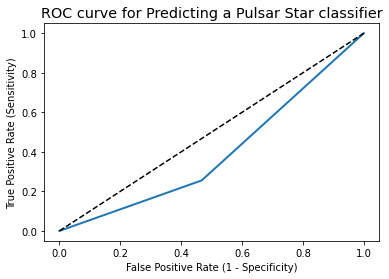

In [56]:
from scikitplot.metrics import plot_roc_curve
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a Pulsar Star classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [ ]:
# compute ROC AUC
from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test, y_pred)
print('ROC AUC : {:.4f}'.format(ROC_AUC))